In [38]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [39]:
#Loading the CSV file
covid_data = pd.read_csv("Confirmed_Cases.csv")

In [40]:
#Printing first 10 values of the dataset
covid_data.head(10)

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Outcome1,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,1934-09-28,2022-09-29,2022-09-29,2022-09-27,<20,FEMALE,NaN,2262,Thunder Bay District Health Unit,999 Balmoral Street,Thunder Bay,P7B 6E7,www.tbdhu.com,48.400572,-89.258851
1,2,1989-02-21,2022-11-08,2022-11-07,2022-11-06,<20,FEMALE,NaN,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
2,3,2000-03-01,2022-01-30,NaN,2000-03-01,<20,FEMALE,NaN,2243,"Leeds, Grenville and Lanark District Health Unit",458 Laurier Boulevard,Brockville,K6V 7A3,www.healthunit.org,44.615843,-75.702833
3,4,2002-07-06,2022-07-06,2022-07-07,2002-07-06,20s,FEMALE,NaN,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
4,5,2002-12-15,2022-08-18,2022-08-18,2022-08-17,UNKNOWN,FEMALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
5,6,2017-01-12,2023-01-17,2023-01-17,2023-01-16,40s,MALE,NaN,2237,Hamilton Public Health Services,"110 King St. West, 2nd Floor",Hamilton,L8P 4S6,www.hamilton.ca/publichealth,43.257631,-79.871341
6,7,2018-08-18,2021-08-21,2021-08-20,2018-08-18,50s,MALE,NaN,2234,Haldimand-Norfolk Health Unit,12 Gilbertson Drive,Simcoe,N3Y 4N5,www.hnhu.org,42.847825,-80.303815
7,8,2019-05-30,2020-05-05,2020-05-05,2020-05-03,50s,FEMALE,NaN,2260,Simcoe Muskoka District Health Unit,15 Sperling Drive,Barrie,L4M 6K9,www.simcoemuskokahealth.org,44.410713,-79.686306
8,9,2019-11-20,2020-10-21,2020-11-21,2019-11-20,20s,FEMALE,NaN,4913,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
9,10,2019-12-18,2021-12-20,2021-12-20,2019-12-18,30s,MALE,NaN,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239


In [41]:
#Dropping unnecessary columns for analysis purpose
covid_data.drop(["Accurate_Episode_Date","Test_Reported_Date","Specimen_Date","Reporting_PHU_Address",
                "Reporting_PHU_Postal_Code","Reporting_PHU_Website","Reporting_PHU_Latitude","Reporting_PHU_Longitude",
                "Row_ID","Reporting_PHU_ID","Reporting_PHU"]
                          ,inplace = True, axis = 1)


In [42]:
#General Information about the dataset
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Case_Reported_Date  1048575 non-null  object
 1   Age_Group           1048575 non-null  object
 2   Client_Gender       1048575 non-null  object
 3   Outcome1            11858 non-null    object
 4   Reporting_PHU_City  1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [43]:
#Converting the Case_Reported_Date column data type to datetime
covid_data['Case_Reported_Date'] = pd.to_datetime(covid_data['Case_Reported_Date'],format = '%Y-%m-%d')

In [44]:
covid_data.head()

,Case_Reported_Date,Age_Group,Client_Gender,Outcome1,Reporting_PHU_City
0,2022-09-29,<20,FEMALE,NaN,Thunder Bay
1,2022-11-08,<20,FEMALE,NaN,Newmarket
2,2022-01-30,<20,FEMALE,NaN,Brockville
3,2022-07-06,20s,FEMALE,NaN,Newmarket
4,2022-08-18,UNKNOWN,FEMALE,NaN,Toronto


In [45]:
#Renaming the column name to Severity for easy visualization
covid_data = covid_data.rename(columns={"Outcome1":"Severity"})

In [46]:
#Renaming the NaN values in the Outcome1 column to NON FATAL
covid_data['Severity'] = covid_data['Severity'].replace(np.nan,'NON FATAL')

In [47]:
covid_data.head()

,Case_Reported_Date,Age_Group,Client_Gender,Severity,Reporting_PHU_City
0,2022-09-29,<20,FEMALE,NON FATAL,Thunder Bay
1,2022-11-08,<20,FEMALE,NON FATAL,Newmarket
2,2022-01-30,<20,FEMALE,NON FATAL,Brockville
3,2022-07-06,20s,FEMALE,NON FATAL,Newmarket
4,2022-08-18,UNKNOWN,FEMALE,NON FATAL,Toronto


In [48]:
#Displaying the last 5 value sof the dataset
covid_data.tail()

,Case_Reported_Date,Age_Group,Client_Gender,Severity,Reporting_PHU_City
1048570,2022-01-29,40s,FEMALE,NON FATAL,Barrie
1048571,2022-01-29,40s,MALE,NON FATAL,Toronto
1048572,2022-01-29,50s,FEMALE,NON FATAL,Toronto
1048573,2022-01-29,50s,FEMALE,NON FATAL,Brantford
1048574,2022-01-29,60s,FEMALE,NON FATAL,Toronto


In [49]:
#Printing the count values for Gender
client_gender_counts = covid_data['Client_Gender'].value_counts()
client_gender_counts

FEMALE            540248
MALE              502502
UNSPECIFIED         5822
GENDER DIVERSE         3
Name: Client_Gender, dtype: int64

In [50]:
#Printing the count values for Severity
severity_counts = covid_data['Severity'].value_counts()
severity_counts

NON FATAL    1036717
FATAL          11858
Name: Severity, dtype: int64

In [51]:
#Printing the count values for Age_Group
age_group_counts = covid_data['Age_Group'].value_counts()
age_group_counts

20s        227597
<20        182199
30s        178716
40s        151751
50s        139755
60s         83791
70s         41604
80s         28185
90+         14668
UNKNOWN       309
Name: Age_Group, dtype: int64

In [52]:
# Extract the year from the "Case_Reported_Date" column
covid_data['Year'] = covid_data['Case_Reported_Date'].dt.year

In [53]:
covid_data.head(10)

,Case_Reported_Date,Age_Group,Client_Gender,Severity,Reporting_PHU_City,Year
0,2022-09-29,<20,FEMALE,NON FATAL,Thunder Bay,2022
1,2022-11-08,<20,FEMALE,NON FATAL,Newmarket,2022
2,2022-01-30,<20,FEMALE,NON FATAL,Brockville,2022
3,2022-07-06,20s,FEMALE,NON FATAL,Newmarket,2022
4,2022-08-18,UNKNOWN,FEMALE,NON FATAL,Toronto,2022
5,2023-01-17,40s,MALE,NON FATAL,Hamilton,2023
6,2021-08-21,50s,MALE,NON FATAL,Simcoe,2021
7,2020-05-05,50s,FEMALE,NON FATAL,Barrie,2020
8,2020-10-21,20s,FEMALE,NON FATAL,St. Thomas,2020
9,2021-12-20,30s,MALE,NON FATAL,Newmarket,2021


In [54]:
# Dropping the rows of GENDER DIVERSE and UNSPECIFIED from the dataset
covid_data = covid_data[covid_data["Client_Gender"].str.contains("GENDER DIVERSE|UNSPECIFIED") == False]

In [55]:
# Dropping the rows of UNKNOWN from the dataset
covid_data = covid_data[covid_data["Age_Group"].str.contains("UNKNOWN") == False]

In [56]:
# Dropping the rows of 2023 year from the dataset
covid_data = covid_data[covid_data["Year"] != 2023]

In [57]:
covid_data.head(10)

,Case_Reported_Date,Age_Group,Client_Gender,Severity,Reporting_PHU_City,Year
0,2022-09-29,<20,FEMALE,NON FATAL,Thunder Bay,2022
1,2022-11-08,<20,FEMALE,NON FATAL,Newmarket,2022
2,2022-01-30,<20,FEMALE,NON FATAL,Brockville,2022
3,2022-07-06,20s,FEMALE,NON FATAL,Newmarket,2022
6,2021-08-21,50s,MALE,NON FATAL,Simcoe,2021
7,2020-05-05,50s,FEMALE,NON FATAL,Barrie,2020
8,2020-10-21,20s,FEMALE,NON FATAL,St. Thomas,2020
9,2021-12-20,30s,MALE,NON FATAL,Newmarket,2021
10,2020-04-24,80s,MALE,NON FATAL,Simcoe,2020
11,2020-05-17,50s,MALE,NON FATAL,Waterloo,2020


In [58]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042489 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Case_Reported_Date  1042489 non-null  datetime64[ns]
 1   Age_Group           1042489 non-null  object        
 2   Client_Gender       1042489 non-null  object        
 3   Severity            1042489 non-null  object        
 4   Reporting_PHU_City  1042489 non-null  object        
 5   Year                1042489 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 55.7+ MB


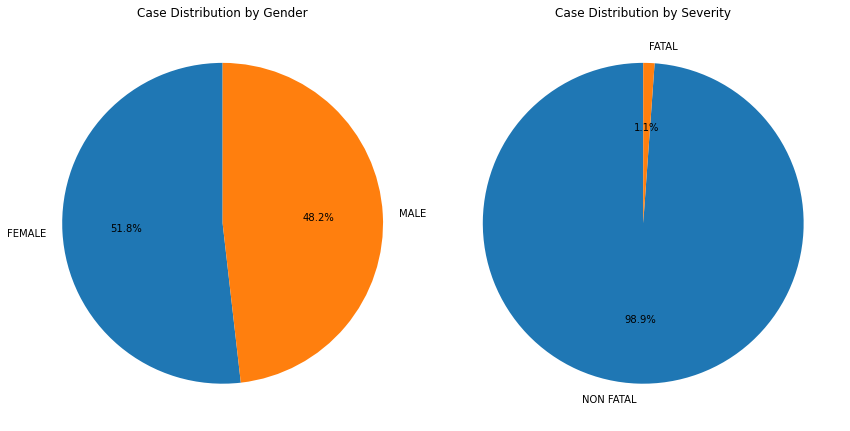

In [59]:
# Create two subplots for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Pie chart for Client_Gender
client_gender_counts = covid_data['Client_Gender'].value_counts()
axes[0].pie(client_gender_counts,labels=client_gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Case Distribution by Gender')

# Pie chart for Severity
severity_counts = covid_data['Severity'].value_counts()
axes[1].pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Case Distribution by Severity')

# Display the pie charts
plt.tight_layout()
plt.show()

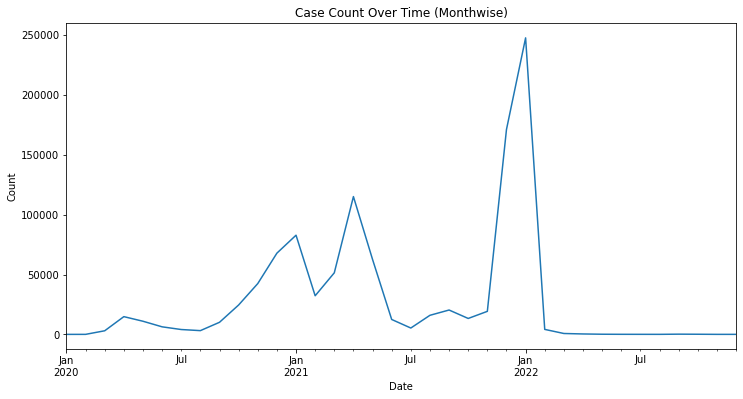

In [60]:
#Time Series Graph to display the number of cases over time (Monthwise)
covid_data.set_index('Case_Reported_Date', inplace=True)
plt.figure(figsize=(12, 6))
covid_data.resample('M').size().plot(legend=False)
plt.title('Case Count Over Time (Monthwise)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [61]:
covid_data = covid_data.reset_index()

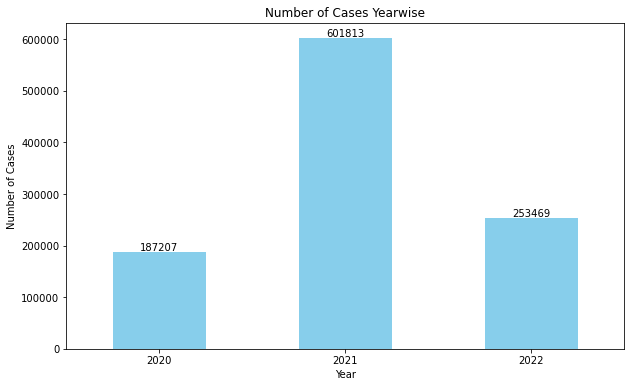

In [62]:
# Group the data by year and count the number of cases for each year
yearwise_cases = covid_data['Year'].value_counts().sort_index()

# Create a bar graph to visualize the data
plt.figure(figsize=(10, 6))
ax = yearwise_cases.plot(kind='bar', color='skyblue')
plt.title('Number of Cases Yearwise')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)

# Add labels (number of cases) above each bar
for i, v in enumerate(yearwise_cases):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

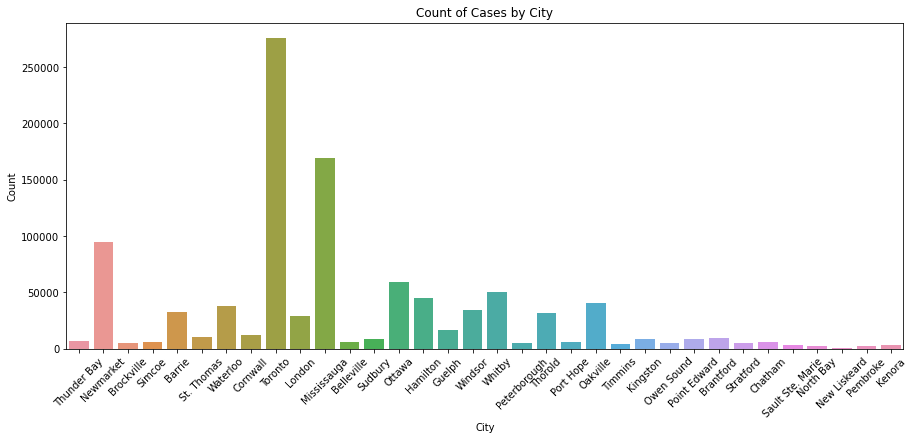

In [63]:
# Creating a countplot for cases by severity and city
plt.figure(figsize=(15, 6))
sns.countplot(data=covid_data, x="Reporting_PHU_City")
plt.title("Count of Cases by City")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

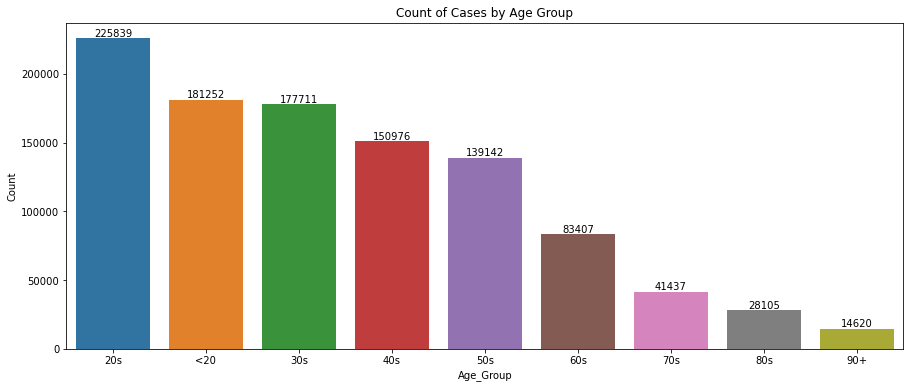

In [64]:
# Creating a countplot for cases by severity and city
plt.figure(figsize=(15, 6))

ax = sns.countplot(data=covid_data, x="Age_Group", order=covid_data['Age_Group'].value_counts().index)
plt.title("Count of Cases by Age Group")
plt.xlabel("Age_Group")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Add number of cases values over the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

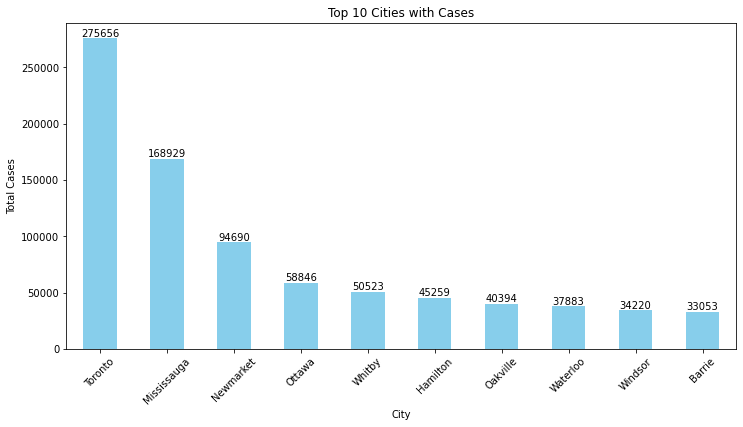

In [65]:
# Group the data by Reporting_PHU_City and Severity and count the number of cases
city_severity_counts = covid_data.groupby(['Reporting_PHU_City', 'Severity']).size().unstack().fillna(0)

# Calculate the total number of cases (Fatal + Non-Fatal) for each city
city_severity_counts['Total'] = city_severity_counts['FATAL'] + city_severity_counts['NON FATAL']

# Sort the cities based on the total number of cases in descending order
sorted_cities = city_severity_counts.sort_values(by='Total', ascending=False).head(10)

# Create a bar plot for the top 10 cities
plt.figure(figsize=(12, 6))
ax = sorted_cities['Total'].plot(kind='bar', color='skyblue')
plt.xlabel('City')
plt.ylabel('Total Cases')
plt.title('Top 10 Cities with Cases')
plt.xticks(rotation=45)

# Add number of cases values over the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

In [66]:
# Creating a pivot table to summarize the information
pivot_table = pd.pivot_table(covid_data, 
                              values='Case_Reported_Date',  # Column to aggregate (we can choose any)
                              index=['Age_Group', 'Client_Gender'],  # Rows in the pivot table
                              columns=['Severity'],  # Columns in the pivot table
                              aggfunc='count',  # Aggregation function (count for counting cases)
                              fill_value=0)  # Replace NaN values with 0

# Print the pivot table
print(pivot_table)

Severity                 FATAL  NON FATAL
Age_Group Client_Gender                  
20s       FEMALE            14     116087
          MALE              18     109720
30s       FEMALE            30      92661
          MALE              56      84964
40s       FEMALE            75      81717
          MALE             134      69050
50s       FEMALE           224      72639
          MALE             413      65866
60s       FEMALE           496      40357
          MALE             954      41600
70s       FEMALE           974      19483
          MALE            1571      19409
80s       FEMALE          1873      14435
          MALE            2023       9774
90+       FEMALE          1860       8419
          MALE            1086       3255
<20       FEMALE             4      88769
          MALE               5      92474


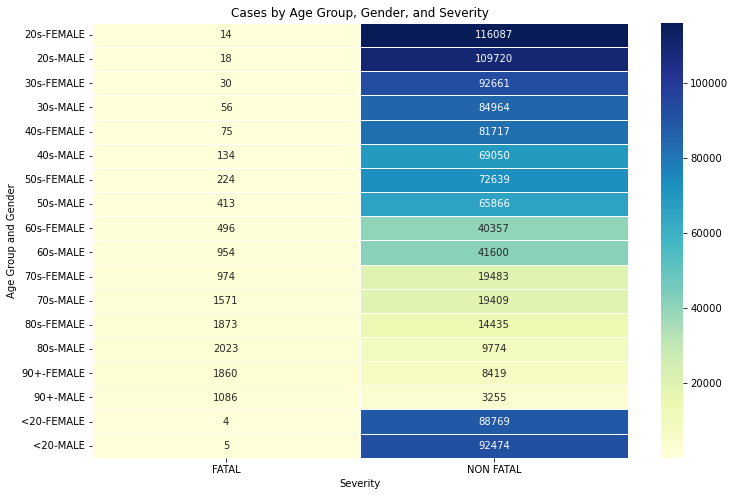

In [67]:
#Plotting the Heatmap to visualize cases based on the Gender and Age Group
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)
plt.title("Cases by Age Group, Gender, and Severity")
plt.xlabel("Severity")
plt.ylabel("Age Group and Gender")
plt.show()

### Age and Gender Distribution:

The dataset covers a broad range of age groups, from "<20" to "90+," with cases distributed across these groups.
Both males and females are represented in the dataset, with cases reported for each gender.
There are instances of "GENDER DIVERSE" and "UNSPECIFIED" categories, which may require further investigation or clarification.

### Severity Distribution:

The majority of cases in the dataset fall under the "NON FATAL" category, indicating that most reported cases do not result in fatalities.
"FATAL" cases are present across different age groups and genders but are generally less frequent compared to "NON FATAL" cases.

### Age Group Insights:

The highest number of cases, both "FATAL" and "NON FATAL," is reported in the "80s" and "70s" age groups, followed by the "60s."
The "<20" age group also has a significant number of cases, primarily "NON FATAL," indicating that individuals in this age group are affected by the reported incidents.

### Gender Insights:

Both males and females are affected by the reported cases across all age groups.
In most age groups, the number of "FATAL" cases is lower compared to "NON FATAL" cases, suggesting that the majority of cases do not result in fatalities.

Unknown Gender: There are instances of "GENDER DIVERSE" and "UNSPECIFIED" genders in the dataset, but they represent a small portion of cases.

## Recommendations and Further Analysis:

Focus on Prevention: Given that "NON FATAL" cases significantly outnumber "FATAL" cases, a focus on preventive measures and safety protocols can help reduce the severity of incidents.

Elderly Population: The "80s" and "70s" age groups show a relatively high number of FATAL cases. Senior management may consider targeted interventions to improve safety for elderly individuals.

Data Quality: Further investigation may be needed to understand and potentially clarify the "GENDER DIVERSE" and "UNSPECIFIED" categories, ensuring data quality and accuracy.

Continuous Monitoring: Ongoing monitoring of cases by severity, age, and gender is essential to identify trends, respond to emerging issues, and implement proactive measures.

Public Communication: Depending on the nature of the reported incidents, senior management may consider appropriate public communication and awareness campaigns to promote safety.

Collaboration: Collaboration with relevant agencies, healthcare providers, and authorities may be necessary to address specific issues related to reported cases.